## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from functools import reduce
import dateutil
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergy_mouse_dup = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mergy_mouse_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice.
mice_count = mergy_mouse_dup['Mouse ID'].nunique()
mice_count

249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# mouse_time = mergy_mouse.groupby(['Mouse ID', 'Timepoint']).size().sort_values(ascending=False)
# mouse_time.head(10)

# Count duplicate on certain columns
mergy_mouse_dup.duplicated(subset=['Mouse ID', 'Timepoint']).sum()





5

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 

mergy_mouse_dup.loc[mergy_mouse_dup.duplicated(subset=['Mouse ID', 'Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mergy_mouse = mergy_mouse_dup.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mergy_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
mice_count = mergy_mouse['Mouse ID'].nunique()
mice_count

249

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# mergy_mouse.columns

# mean
mean_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').mean(),2)
mean_mergy_mouse = mean_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
mean_mergy_mouse

# median

median_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').median(),2)
median_mergy_mouse = median_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})
median_mergy_mouse

# variance
var_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').var(),2)
var_mergy_mouse = var_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Variance Tumor Volume (mm3)"})
var_mergy_mouse

# StdDEV
stdv_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').std(),2)
stdv_mergy_mouse = stdv_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Std.Dev Tumor Volume (mm3)"})
stdv_mergy_mouse

# SEM
sem_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').sem(),2)
sem_mergy_mouse = sem_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"SEM Tumor Volume (mm3)"})
sem_mergy_mouse

# data = mean_mergy_mouse['Mean Tumor Volume (mm3)']
# sem(data)

# Assemble the resulting series into a single summary dataframe.
# compile the list of dataframes you want to merge
data_frames = [mean_mergy_mouse, median_mergy_mouse, var_mergy_mouse, stdv_mergy_mouse, sem_mergy_mouse]
sum_mergy_mouse = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), data_frames)

sum_mergy_mouse




,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std.Dev Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_line = round((mergy_mouse.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
         .agg([('Mean Tumor Volume (mm3)','mean'),('Median Tumor Volume (mm3)','median'),
         ('Variance Tumor Volume (mm3)','var'),('Std.Dev Tumor Volume (mm3)','std'),
         ('SEM Tumor Volume (mm3)','sem')])),2)
single_line

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std.Dev Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [48]:
# Generate a bar plot showing the total number of timepoints 
# for all mice tested for each drug regimen using Pandas.

# Set x axis and tick locations
x_axis = np.arange(len(bar1_mergy_mouse))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, bar1_mergy_mouse["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, bar1_mergy_mouse["Drug Regimen"], rotation="45")

# Set a Title and labels
plt.title("Sum of All Mice Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Sum of Timepoints")
plt.legend(["Timepoint"], loc='best')


NameError: name 'bar1_mergy_mouse' is not defined

<AxesSubplot:title={'center':'Sum of All Mice Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Sum of Timepoints'>

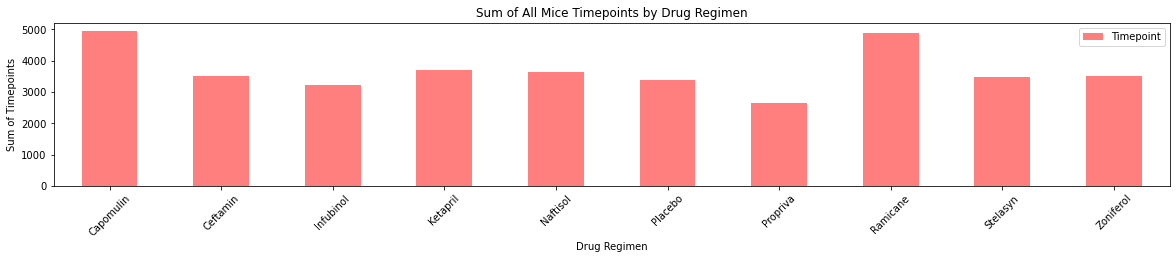

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

from matplotlib import pyplot as plt
 
bar1_mergy_mouse.plot(x="Drug Regimen", y="Timepoint", kind='bar', color='r', alpha=0.5, align="center", 
title="Sum of All Mice Timepoints by Drug Regimen", xlabel="Drug Regimen", ylabel="Sum of Timepoints",figsize=(20,3), legend="best", rot="45")


Text(0.5, 1.0, '% of Mice by Sex')

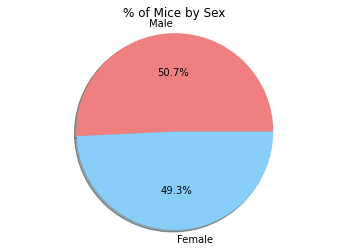

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex = pd.DataFrame(mergy_mouse['Sex'].value_counts())
mice_sex.reset_index(inplace=True)


# Labels for the sections of our pie chart
labels = mice_sex['index']

# The values of each section of the pie chart
sizes = mice_sex['Sex']

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.0, 0.0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("% of Mice by Sex")

<AxesSubplot:title={'center':'% of Mice by Sex'}>

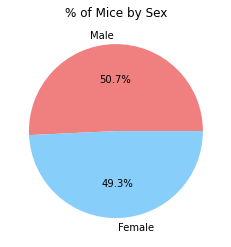

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = pd.DataFrame(mergy_mouse['Sex'].value_counts())
mice_sex.reset_index(inplace=True)
mice_sex = mice_sex.rename(columns={"index": "Sex", "Sex": "Count"})
mice_sex

# Labels for the sections of our pie chart
labels = mice_sex['Sex']

# The values of each section of the pie chart
sizes = str(mice_sex['Count'])

# The colors of each section of the pie chart
colors = ("lightcoral", "lightskyblue")

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.0, 0.0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
# Tells matplotlib that we want a pie chart with equal axes

mice_sex.plot(kind="pie", x="Sex", y="Count", colors=colors, autopct="%1.1f%%", startangle=0, explode=explode, legend=False, labels=labels, 
ylabel="", title="% of Mice by Sex")




## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#create a new df only capture the four regimens
mergy_mouse
four_options = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
qop_data = mergy_mouse[mergy_mouse['Drug Regimen'].isin(four_options)]
# qop_data



# Start by getting the last (greatest) timepoint for each mouse


lst_tp = qop_data.drop_duplicates(subset=['Mouse ID'], keep='last')
lst_tp.set_index(['Mouse ID'], inplace=True)
max_tumors = lst_tp['Tumor Volume (mm3)']
lst_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#****This was already accomplised in the previous step without requireing a merge.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3
y163,Infubinol,Female,17,27,45,67.685569,3
y769,Ceftamin,Female,6,27,45,68.594745,4


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
# treat_list = four_options
# print(treat_list)

# Create empty list to fill with tumor vol data (for plotting)

tum_vol_data = lst_tp['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tum_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of max tumor size is: {lowerq}")
print(f"The upper quartile of max tumor size is: {upperq}")
print(f"The interquartile range of max tumor size is: {iqr}")
print(f"The the median of max tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
qop_data.loc[qop_data['Drug Regimen'] == "Ramicane"]
    
# add subset 
ramicane_sub = lst_tp.loc[lst_tp['Drug Regimen'] == "Ramicane"]
capomulin_sub = lst_tp.loc[lst_tp['Drug Regimen'] == "Capomulin"]
ceftamin_sub = lst_tp.loc[lst_tp['Drug Regimen'] == "Ceftamin"]
infubinol_sub = lst_tp.loc[lst_tp['Drug Regimen'] == "Infubinol"]
    
    
# Determine outliers using upper and lower bounds
lst_tp.loc[(lst_tp['Tumor Volume (mm3)'] >= 94.04) & (lst_tp['Tumor Volume (mm3)'] <= 3.07)]
    

The lower quartile of max tumor size is: 37.1877438025
The upper quartile of max tumor size is: 59.930261755
The interquartile range of max tumor size is: 22.742517952499995
The the median of max tumor size is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,


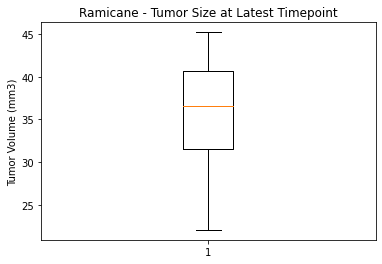

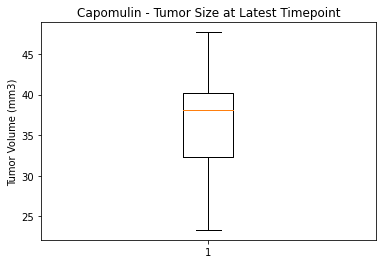

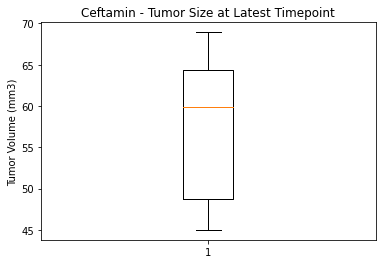

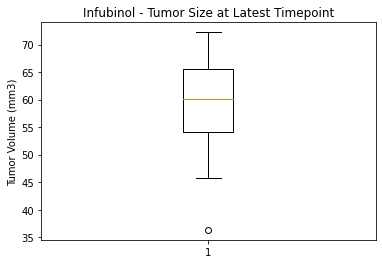

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane - Tumor Size at Latest Timepoint')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane_sub['Tumor Volume (mm3)'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin - Tumor Size at Latest Timepoint')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_sub['Tumor Volume (mm3)'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin - Tumor Size at Latest Timepoint')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftamin_sub['Tumor Volume (mm3)'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol - Tumor Size at Latest Timepoint')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infubinol_sub['Tumor Volume (mm3)'])
plt.show()



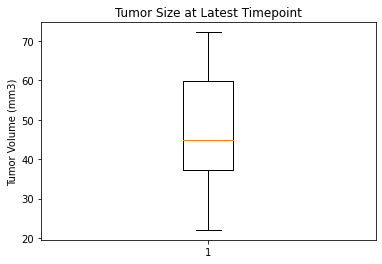

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size at Latest Timepoint')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tum_vol_data)
plt.show()

## Line and Scatter Plots

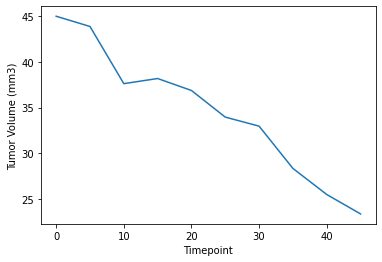

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


# created a single dataframe to hold the full data for mouse s185 treated with Capomulin
cap_all = qop_data.loc[qop_data['Drug Regimen'] == "Capomulin"]
cap_all_185 = cap_all.loc[cap_all['Mouse ID'] == "s185"]
cap_all_185

# created a plot showing the size of tumor volume over time for a single mouse
plt.plot(cap_all_185.iloc[:,5],cap_all_185.iloc[:,6])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
